Đã vẽ xong! File ảnh được lưu là: contention_heatmap.png


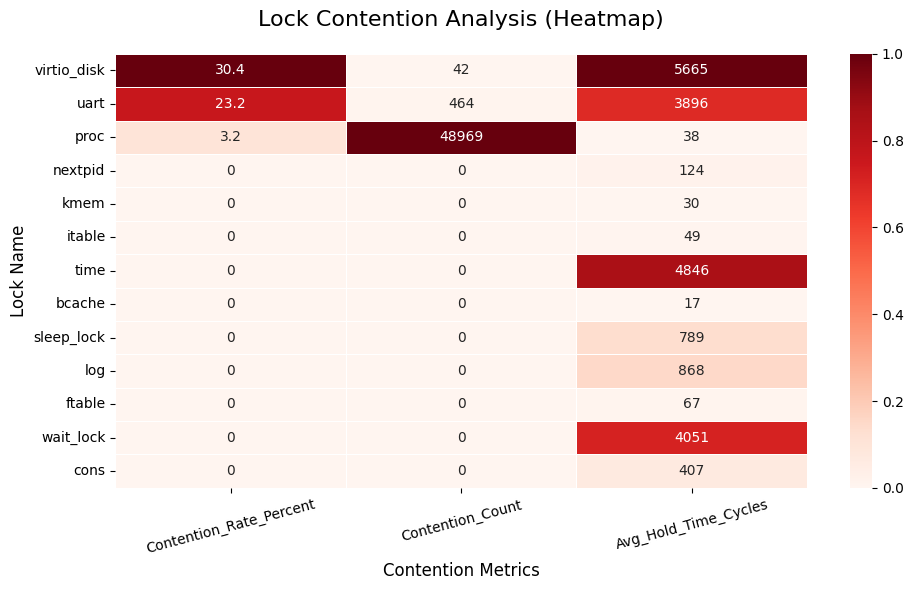

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

csv_data = """Lock_Name,Acquire_Count,Contention_Count,Contention_Rate_Percent,Avg_Hold_Time_Cycles
virtio_disk,138,42,30.4,5665
uart,1992,464,23.2,3896
proc,1489546,48969,3.2,38
nextpid,4,0,0.0,124
kmem,196,0,0.0,30
itable,34,0,0.0,49
time,5111,0,0.0,4846
bcache,1250,0,0.0,17
sleep_lock,1923,0,0.0,789
log,34,0,0.0,868
ftable,17,0,0.0,67
wait_lock,8,0,0.0,4051
cons,44,0,0.0,407"""

df = pd.read_csv(io.StringIO(csv_data))

# Sắp xếp theo Tỷ lệ tranh chấp giảm dần
df = df.sort_values('Contention_Rate_Percent', ascending=False)
df = df.set_index('Lock_Name')

# Chọncột để hiển thị về Contention
cols_to_plot = ['Contention_Rate_Percent', 'Contention_Count', 'Avg_Hold_Time_Cycles']
df_plot = df[cols_to_plot]

# (Min-Max Normalization)
df_norm = (df_plot - df_plot.min()) / (df_plot.max() - df_plot.min())
df_norm = df_norm.fillna(0) # Tránh lỗi nếu cột toàn số 0

# 4. Vẽ Heatmap
plt.figure(figsize=(10, 6))

ax = sns.heatmap(df_norm, annot=df_plot, fmt='g', cmap='Reds', linewidths=.5)

plt.title('Lock Contention Analysis (Heatmap)', fontsize=16, pad=20)
plt.ylabel('Lock Name', fontsize=12)
plt.xlabel('Contention Metrics', fontsize=12)
plt.xticks(rotation=15)

#saved
plt.tight_layout()
plt.savefig('contention_heatmap.png', dpi=300)
print("Đã vẽ xong! File ảnh được lưu là: contention_heatmap.png")
plt.show()